In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [3]:
with open('run-metrics.json', 'r') as f:
    data = json.load(f)
print(data)

{'variance_metrics': {'full_set_var_sum': 0.8371616005897522, 'full_set_var_values': [0.045681219547986984, 0.030603904277086258, 0.029345836490392685, 0.026773635298013687, 0.02451908029615879, 0.022191615775227547, 0.02012275904417038, 0.018668321892619133, 0.01699906215071678, 0.0161441620439291, 0.015137050300836563, 0.01488886121660471, 0.014030903577804565, 0.013279978185892105, 0.012955030426383018, 0.012708143331110477, 0.012045631185173988, 0.011758376844227314, 0.011413678526878357, 0.01112492848187685, 0.010817628353834152, 0.010292262770235538, 0.010020196437835693, 0.0099154869094491, 0.00980390701442957, 0.009520405903458595, 0.009171979501843452, 0.009023783728480339, 0.008810154162347317, 0.008649900555610657, 0.008559624664485455, 0.008421508595347404, 0.008255038410425186, 0.008040486834943295, 0.00796289462596178, 0.007754337042570114, 0.007561211474239826, 0.007403586059808731, 0.007246369495987892, 0.007178264670073986, 0.007105707190930843, 0.007073891814798117, 0

In [4]:
variance_metrics = data['variance_metrics']
modelling_metrics = data['modelling_metrics']

In [15]:
r2_values = variance_metrics['r2_values']
mn = min(variance_metrics['r2_values'])
mx = max(variance_metrics['r2_values'])

norm = mx - mn

scaled_r2_values = [(val - mn)/norm for val in r2_values]
scaled_r2_values

[0.0,
 0.557532423472788,
 0.7343751354613822,
 0.8321705430340849,
 0.8795809479393822,
 0.9098985680285466,
 0.9440076242195201,
 0.9660380866143533,
 0.9676466532729735,
 1.0]

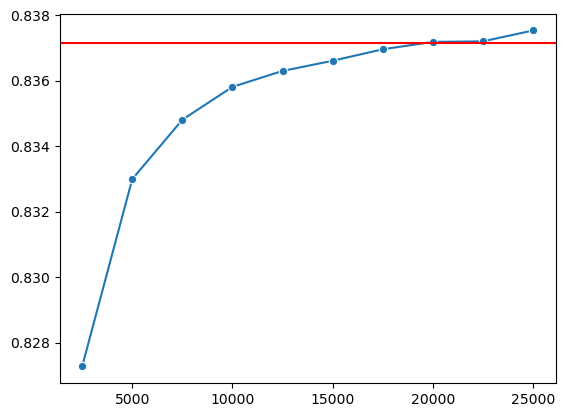

In [14]:
graph = sns.lineplot(x=variance_metrics['subset_sizes'], y=variance_metrics['r2_values'], marker="o")
graph.axhline(variance_metrics['full_set_var_sum'], color='red')
plt.show()

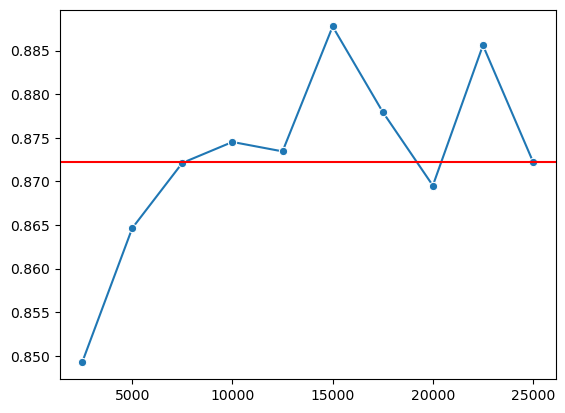

In [6]:
graph = sns.lineplot(x=modelling_metrics['subset_size'], y=modelling_metrics['test_accuracies'], marker="o")
graph.axhline(modelling_metrics['test_accuracies'][-1], color='red')
plt.show()

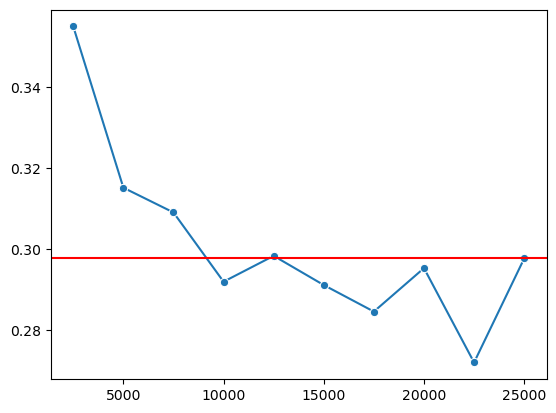

In [7]:
graph = sns.lineplot(x=modelling_metrics['subset_size'], y=modelling_metrics['test_losses'], marker="o")
graph.axhline(modelling_metrics['test_losses'][-1], color='red')
plt.show()

In [16]:
test_accuracies = modelling_metrics['test_accuracies']
mn = min(test_accuracies)
mx = max(test_accuracies)

norm = mx - mn

scaled_acc_values = [(val - mn)/norm for val in test_accuracies]
scaled_acc_values

[0.0,
 0.3997923156801654,
 0.5939771547248186,
 0.6562824506749733,
 0.6282450674974039,
 1.0,
 0.7455867082035298,
 0.5264797507788153,
 0.9439252336448614,
 0.5970924195223266]

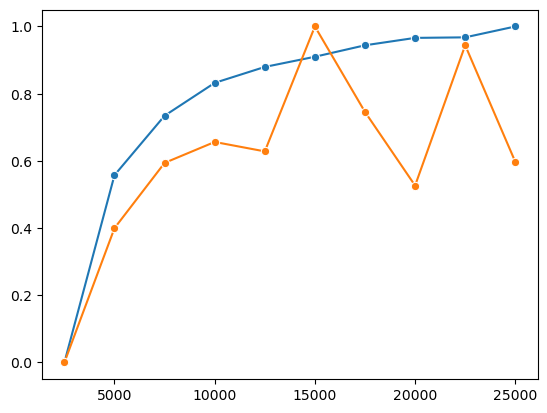

In [17]:
sns.lineplot(x=variance_metrics['subset_sizes'], y=scaled_r2_values, marker="o")
sns.lineplot(x=variance_metrics['subset_sizes'], y=scaled_acc_values, marker="o")
plt.show()

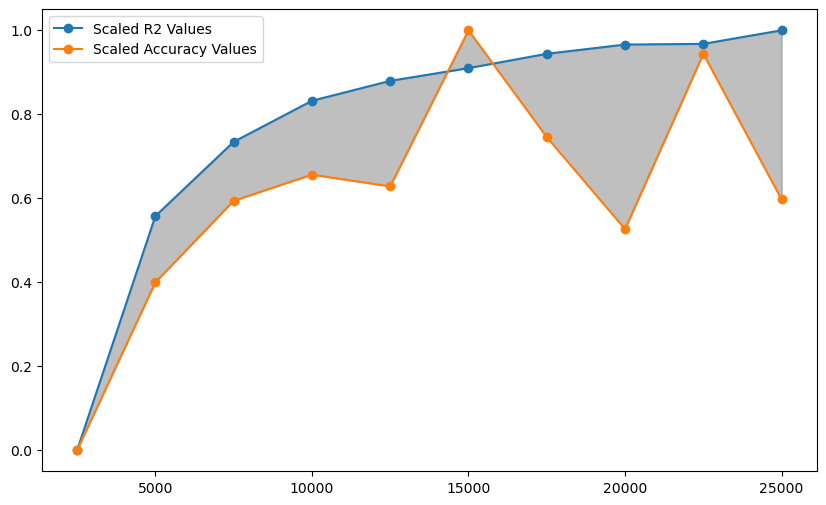

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(variance_metrics['subset_sizes'], scaled_r2_values, marker="o", label='Scaled R2 Values')
plt.plot(variance_metrics['subset_sizes'], scaled_acc_values, marker="o", label='Scaled Accuracy Values')
plt.fill_between(variance_metrics['subset_sizes'], scaled_r2_values, scaled_acc_values, color='gray', alpha=0.5)
plt.legend()
plt.show()